# WeatherPy

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from datetime import datetime as dt
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# City Count

In [27]:
# Print the city count to confirm sufficient count
len(cities)

638

# Generate Cities API Status Report

In [3]:
# Creating base url
url = f"http://api.openweathermap.org/data/2.5/weather?q="

# Create empty list to hold required data

city_name = []
city_cloudiness = []
city_country = []
date = []
city_humidity = []
city_lats = []
city_lngs = []
city_maxtemps = []
city_windspeed = []

# initialize count variables for counting city and set
item = 1
batch = 1

# Print header before displaying for loop data
print("Beginning Data Retrieval")
print("----------------------------")

# for loop through list of cities and requstfor data on each city
for city in cities:
   
    # build query url with city
    q_url = url + city + f"&appid={weather_api_key}"
    
    # get response as json
    cities_data = requests.get(q_url).json()
    
    # retrieve required data into list
    try:
        print(f"Processing Record {item} of Set {batch} | {city}")
        city_name.append(cities_data["name"])
        city_cloudiness.append(cities_data["clouds"]["all"])
        city_country.append(cities_data["sys"]["country"])
        date.append(cities_data["dt"])
        city_humidity.append(cities_data["main"]["humidity"])
        city_lats.append(cities_data["coord"]["lat"])
        city_lngs.append(cities_data["coord"]["lon"])
        city_maxtemps.append(cities_data["main"]["temp_max"])
        city_windspeed.append(cities_data["wind"]["speed"])
        
        # increase item count by one
        item += 1
        
        # use if statemaent to limit API calls to 50
        if item > 50:
            
            # start a new set of items
            batch += 1
            # reset item count to 1 for next set
            item = 1
          
        #sleep time for 1 sec
            time.sleep(1)
    
    # if hit error        
    except:
        print(f"City '{city}' not found. Continue...")
        
# print completion header after displaing for loop data
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

# Convert Raw Data to DataFrame

In [85]:
#create a data frame 
city_temp_df = pd.DataFrame({"City": city_name,
                             "Cloudiness": city_cloudiness,
                             "Country": city_country,
                             "Date": date,
                             "Humidity": city_humidity,
                             "Lat": city_lats,
                             "Lng": city_lngs,
                             "Max Temp": city_maxtemps,                         
                             "Wind Speed": city_windspeed, 
                             })

city_temp_df["Date"] = pd.to_datetime(city_temp_df["Date"]).dt.date

# save dataframe to .csv file
# city_temp_df.to_csv("output_data/cities.csv", index=True, index_label="City ID", header=True)

# display dataframe
city_temp_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,The Valley,40,AI,1970-01-01,70,18.2170,-63.0578,303.07,6.17
1,Shīeli,100,KZ,1970-01-01,36,44.1667,66.7500,286.08,1.50
2,La Unión,97,PE,1970-01-01,52,-5.4000,-80.7500,299.36,2.86
3,Cape Town,20,ZA,1970-01-01,46,-33.9258,18.4232,293.76,8.75
4,Cairns,89,AU,1970-01-01,90,-16.9167,145.7667,300.12,1.54


# Describe of DataFrame

In [33]:
city_temp_df.describe()

,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,60.054608,70.839590,19.197671,27.930433,285.840700,3.803823
std,37.405156,21.094777,33.054368,90.220959,15.807927,2.765257
min,0.000000,8.000000,-54.800000,-179.166700,231.040000,0.000000
25%,20.000000,60.000000,-6.882475,-52.244125,275.830000,1.790000
50%,75.000000,76.000000,22.962050,37.059950,289.750000,3.115000
75%,95.000000,87.000000,45.881350,109.057125,298.957500,5.140000
max,100.000000,100.000000,78.218600,179.316700,309.130000,15.710000


#  Inspect the data and remove the cities where the humidity > 100%.

In [52]:
city_temp_df.loc[city_temp_df['Humidity'] > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


# Latitude vs. Temperature Plot

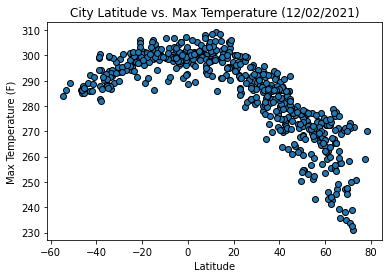

In [92]:
plt.scatter(city_temp_df["Lat"], city_temp_df["Max Temp"], edgecolors="black")

plt.title("City Latitude vs. Max Temperature (12/02/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("output_data/LatVsMaxTemp.png")

plt.show()

# Latitude vs. Humidity Plot

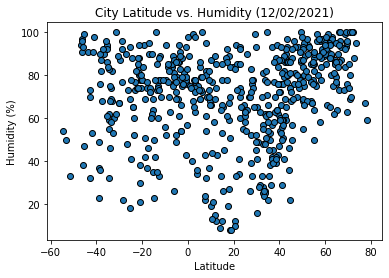

In [93]:
plt.scatter(city_temp_df["Lat"], city_temp_df["Humidity"], edgecolors="black")

plt.title("City Latitude vs. Humidity (12/02/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/LatVsHumidity.png")

plt.show()

# Latitude vs. Cloudiness Plot

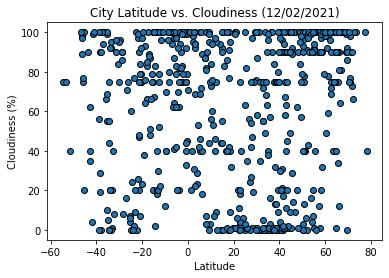

In [95]:
plt.scatter(city_temp_df["Lat"], city_temp_df["Cloudiness"], edgecolors="black")

plt.title("City Latitude vs. Cloudiness (12/02/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/LatVsCloudiness.png")

plt.show()